In [55]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people # dataset of the faces, 
faces = fetch_lfw_people(min_faces_per_person=60)

# Import other necessary elements
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns;

In [56]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [57]:

# PCA and SVC
pca = RandomizedPCA(n_components= 150, random_state=42, whiten=True) # whiten = True to normalize the data

svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline
model = make_pipeline(pca, svc)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=2)

In [59]:
parameters = {'svc__C' : [1, 5, 10, 50], 
              'svc__gamma' : [0.0001, 0.0005, 0.001, 0.005]}

clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

new_model = clf.best_estimator_
print(clf.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [60]:

new_labels = new_model.predict(X_test)

print(new_labels)

[3 1 1 3 7 3 4 5 1 5 2 1 1 7 3 1 3 3 1 1 3 7 3 1 3 4 1 1 3 7 3 4 4 7 2 0 1
 1 2 4 3 5 1 2 3 3 2 7 3 6 0 3 1 3 3 4 7 1 3 3 1 1 0 4 7 3 0 1 7 7 3 0 1 3
 6 3 3 3 1 3 3 3 1 3 1 3 3 1 3 7 3 3 7 3 7 3 3 3 5 3 2 6 3 1 1 1 4 3 3 3 4
 3 1 3 3 1 3 3 1 1 3 4 3 3 3 7 1 1 7 1 3 3 3 7 3 1 7 5 3 3 4 3 1 2 1 3 7 4
 3 7 3 7 3 1 3 5 3 3 3 3 1 3 3 3 1 3 3 6 3 3 3 1 0 1 7 2 3 1 2 3 1 3 2 4 2
 3 2 3 5 0 1 7 3 3 1 2 4 1 3 3 3 3 3 3 4 1 4 1 4 3 6 3 3 3 7 1 7 5 1 0 3 2
 3 6 7 1 3 7 0 7 3 0 1 3 1 3 4 1 3 3 1 1 2 1 1 2 3 3 1 5 3 1 3 3 3 5 3 3 6
 1 3 1 2 3 3 6 1 6 3 7 2 6 7 7 3 1 3 3 3 0 1 0 3 3 4 4 7 1 3 3 4 2 7 3 1 3
 4 3 3 7 5 3 3 3 1 3 7 1 3 3 1 3 1 1 3 2 3 7 3 3 1 3 5 7 2 1 1 3 3 7 2 0 3
 1 3 2 7]


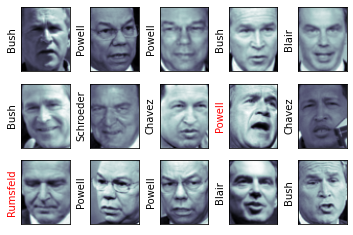

In [61]:
def plot_results(data, y_test):
    fig, ax = plotter.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(62,47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        if y_test[i] == new_labels[i]:
            axi.set_ylabel(faces.target_names[new_labels[i]].split()[-1], color = "black")
        else:
            axi.set_ylabel(faces.target_names[new_labels[i]].split()[-1], color = "red")
plot_results(X_test, y_test)

In [62]:
 print(classification_report(y_test, new_labels,  target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.57      0.71        21
     Colin Powell       0.79      0.94      0.86        65
  Donald Rumsfeld       0.74      0.71      0.72        24
    George W Bush       0.87      0.93      0.90       134
Gerhard Schroeder       0.95      0.81      0.88        26
      Hugo Chavez       1.00      0.71      0.83        17
Junichiro Koizumi       1.00      0.83      0.91        12
       Tony Blair       0.92      0.92      0.92        38

         accuracy                           0.87       337
        macro avg       0.90      0.80      0.84       337
     weighted avg       0.87      0.87      0.86       337



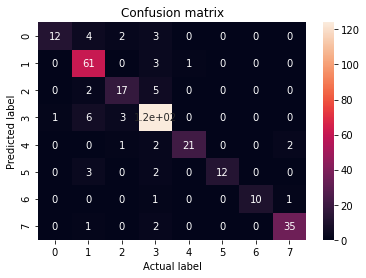

In [63]:
 confmatrix=confusion_matrix(y_test, new_labels, labels=range(faces.target_names.shape[0]))
 sns.heatmap(confmatrix,annot=True)
 plotter.title('Confusion matrix')
 plotter.xlabel('Actual label')
 plotter.ylabel('Predicted label')
 plotter.show()